#**About Dataset**
The Titanic dataset is a well-known dataset in the field of machine learning, commonly used for binary classification tasks. It contains information on the passengers who were aboard the Titanic when it sank in 1912. The primary objective when working with this dataset is to predict whether a passenger survived or not, based on a variety of features.

These features include:

- **Pclass**: The passenger's class (1st, 2nd, or 3rd), which is often correlated with socioeconomic status.
- **Name**: The passenger's name, which can be used to extract additional information like titles.
- **Sex**: The gender of the passenger, a crucial variable in survival analysis.
- **Age**: The age of the passenger, an important factor in survival rates.
- **SibSp**: The number of siblings or spouses the passenger had on board.
- **Parch**: The number of parents or children the passenger had on board.
- **Ticket**: The ticket number, which might contain information such as groupings or travel companions.
- **Fare**: The fare paid by the passenger, which can indicate wealth or social class.
- **Cabin**: The cabin number, potentially revealing more about the passenger's class and location on the ship.
- **Embarked**: The port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
- **Boat**: The lifeboat number, which directly indicates survival but is not available in the training set.
- **Body**: Body identification number, relevant in cases where the passenger did not survive.
- **Home.dest**: The passenger's destination, providing possible insights into their socio-economic background.

A significant challenge when working with the Titanic dataset is dealing with missing values, particularly in the 'Age', 'Cabin', and 'Embarked' fields. Effective handling of these missing values is critical for building an accurate predictive model. Various strategies such as imputation or exclusion can be applied to address these gaps.

By leveraging these features, machine learning models can be trained to predict the likelihood of survival for passengers based on their characteristics. The Titanic dataset thus provides an excellent opportunity to explore techniques for dealing with missing data, feature engineering, and model evaluation in the context of binary classification.

In [29]:
import warnings
warnings.filterwarnings('ignore')

#**Importing Libraries**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(dtype=np.int64)

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent')

from sklearn.impute import KNNImputer
knni = KNNImputer()

import pandas as pd

pd.set_option('display.max_columns',None)

#**Importing Dataset**

In [31]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Titanic.csv")
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


#**Descibing the dataset**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [33]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


#**Preprocessing the dataset**

##**Visualizing the Outliers in dataset**

<Axes: ylabel='age'>

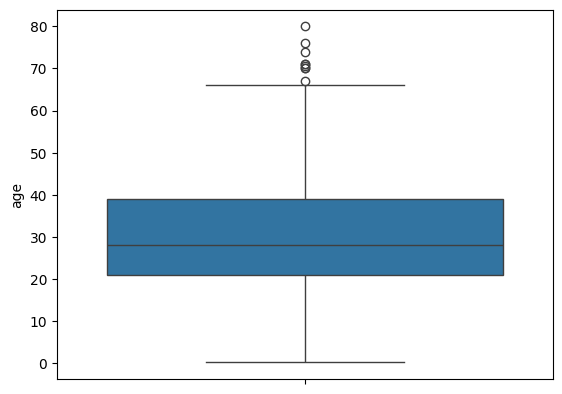

In [34]:
sns.boxplot(df['age'])

In [35]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5*  iqr

In [36]:
df['age'] = np.where(df['age'] > max,max,np.where(df['age'] < min,min,df['age']))
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


<Axes: ylabel='age'>

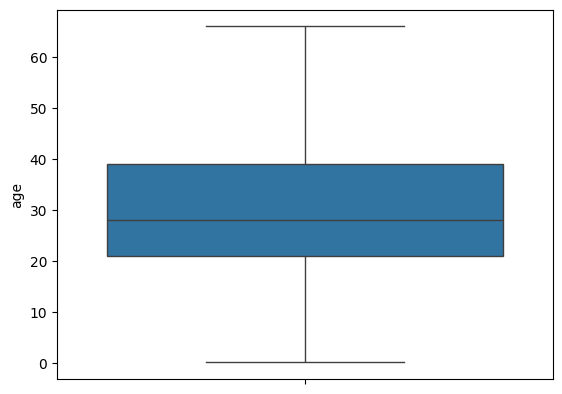

In [37]:
sns.boxplot(df['age'])

<Axes: ylabel='fare'>

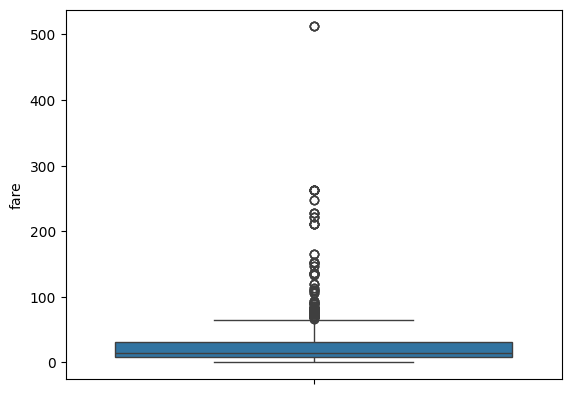

In [38]:
sns.boxplot(df['fare'])

In [39]:
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5*  iqr

In [40]:
df['fare'] = np.where(df['fare'] > max,max,np.where(df['fare'] < min,min,df['fare']))
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,66.3438,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,66.3438,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,66.3438,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,66.3438,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,66.3438,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


<Axes: ylabel='fare'>

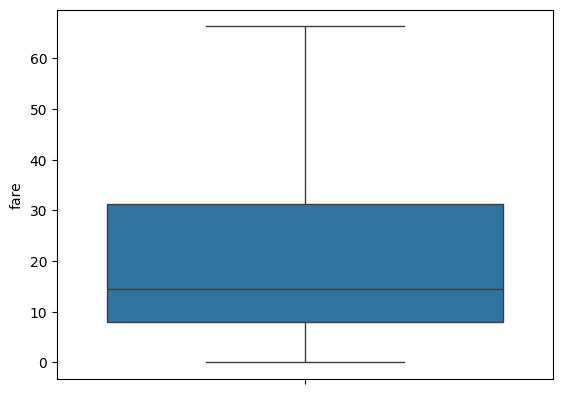

In [41]:
sns.boxplot(df['fare'])

##**Visualizing the missing values in dataset**

<Axes: >

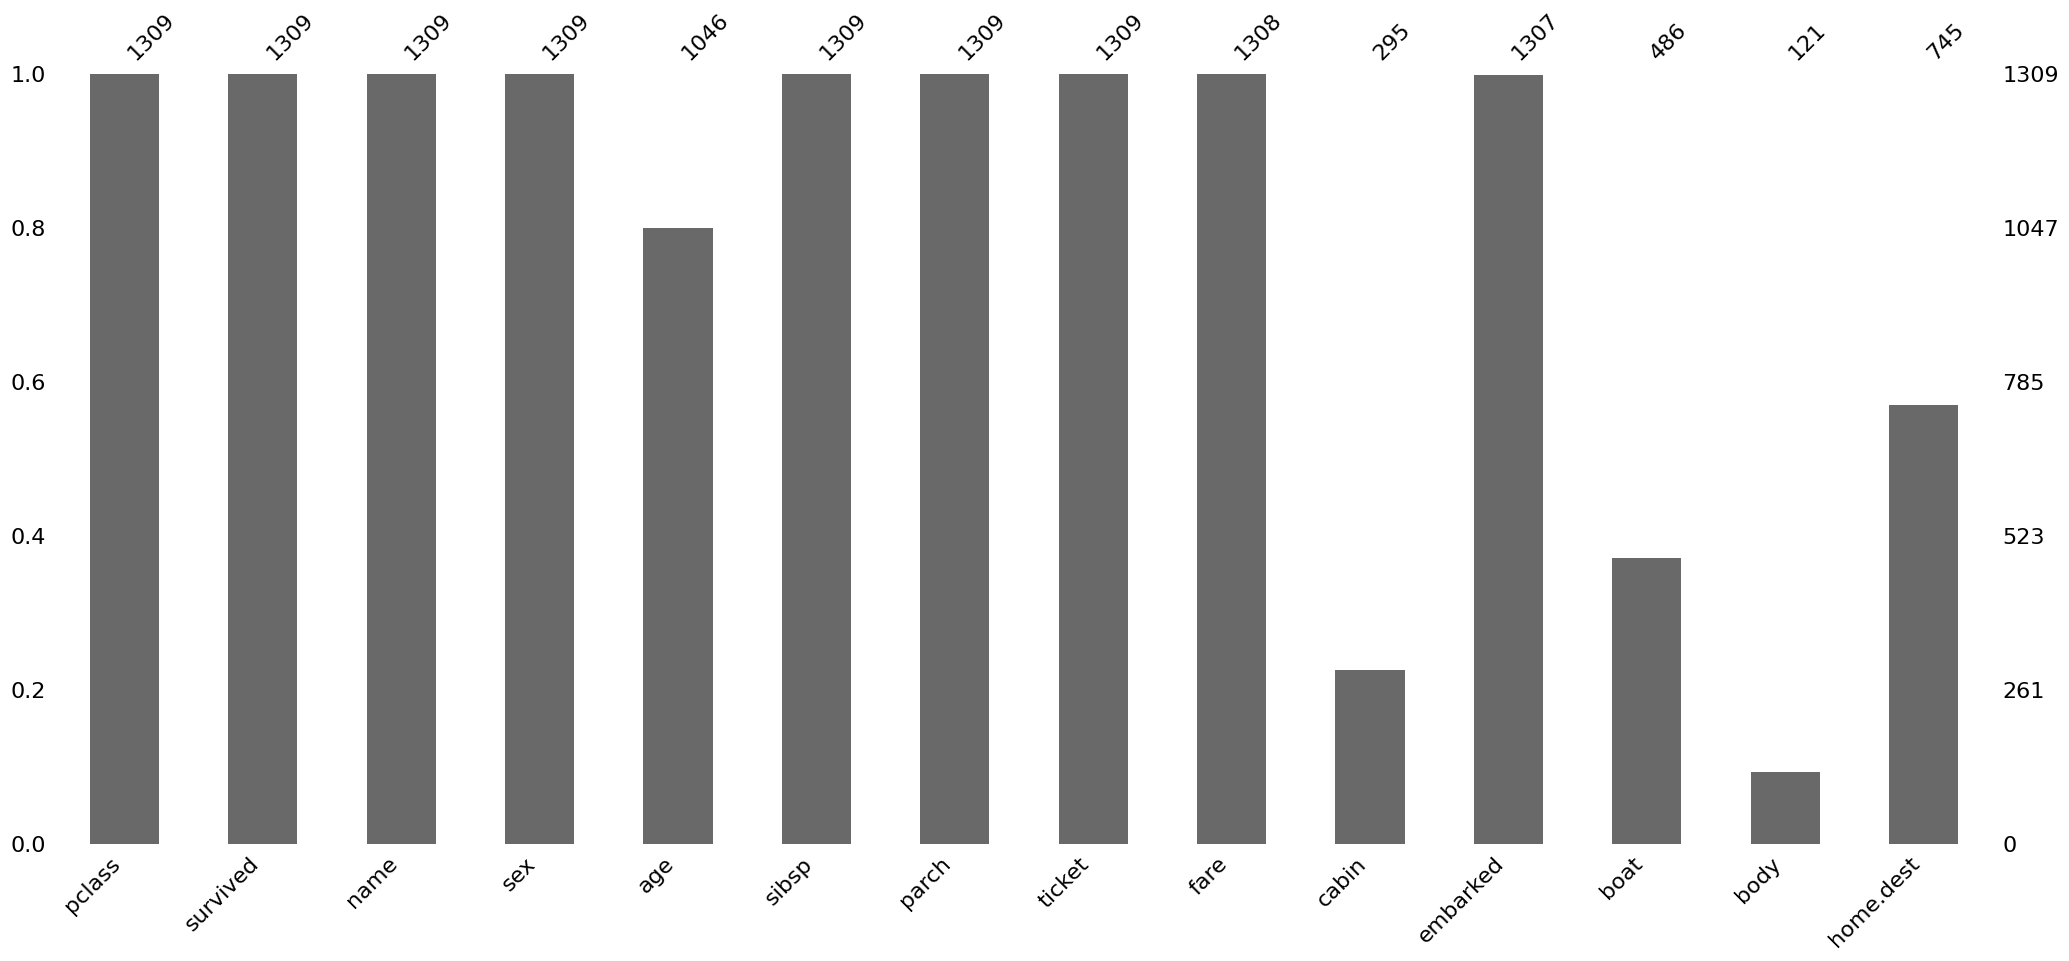

In [42]:
import missingno as msno
msno.bar(df)

In [43]:
df.drop(['cabin','body','boat'],axis=1,inplace=True)
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,66.3438,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,66.3438,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,66.3438,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,66.3438,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,66.3438,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,S,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,66.3438,S,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,S,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,S,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,66.00,0,0,PC 17609,49.5042,C,"Montevideo, Uruguay"


In [44]:
df[['age','fare']] = knni.fit_transform(df[['age','fare']])
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,66.3438,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,66.3438,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,66.3438,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,66.3438,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,66.3438,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,S,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,66.3438,S,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,S,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,S,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,66.00,0,0,PC 17609,49.5042,C,"Montevideo, Uruguay"


<Axes: xlabel='sex', ylabel='survived'>

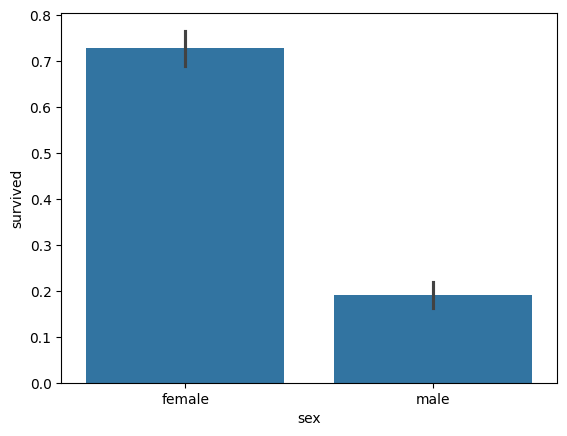

In [45]:
sns.barplot(x=df['sex'],y=df['survived'])

<Axes: xlabel='pclass', ylabel='survived'>

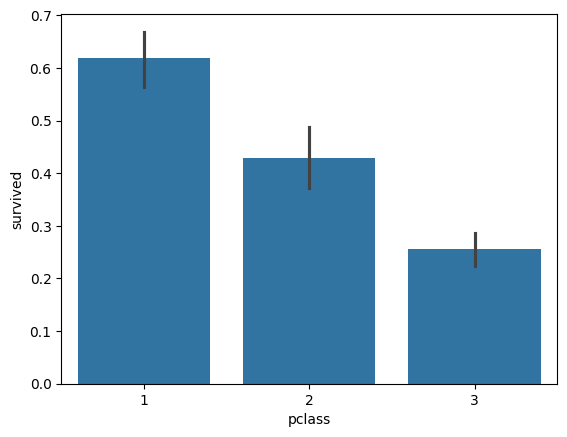

In [46]:
sns.barplot(x=df['pclass'],y=df['survived'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   embarked   1307 non-null   object 
 10  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [48]:
df[['home.dest','embarked']] = si.fit_transform(df[['home.dest','embarked']])

##**Encoding the categorical variables**

In [49]:
df = pd.get_dummies(df, columns=['sex','embarked'], dtype=np.int64)
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",29.00,0,0,24160,66.3438,"St Louis, MO",1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,66.3438,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",2.00,1,2,113781,66.3438,"Montreal, PQ / Chesterville, ON",1,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.00,1,2,113781,66.3438,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,1,2,113781,66.3438,"Montreal, PQ / Chesterville, ON",1,0,0,0,1


In [50]:
df['home.dest'] = oe.fit_transform(df[['home.dest']])
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",29.00,0,0,24160,66.3438,308,1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,66.3438,230,0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",2.00,1,2,113781,66.3438,230,1,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.00,1,2,113781,66.3438,230,0,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,1,2,113781,66.3438,230,1,0,0,0,1


In [51]:
df['ticket'] = oe.fit_transform(df[['ticket']])
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",29.00,0,0,187,66.3438,308,1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,49,66.3438,230,0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",2.00,1,2,49,66.3438,230,1,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.00,1,2,49,66.3438,230,0,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,1,2,49,66.3438,230,1,0,0,0,1


In [52]:
df['Title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
rare_titles = ['Countess', 'Lady', 'Sir', 'Jonkheer', 'Don', 'Dona', 'Rev', 'Col', 'Major', 'Capt']
df['Title'] = df['Title'].replace(rare_titles, 'Other')
df['LastName'] = df['name'].str.split(',').str[0]
df['FamilySize'] = df['sibsp'] + df['parch'] + 1
df = df.drop(['name'], axis=1)

In [53]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['FarePerPerson'] = df['fare'] / (df['FamilySize'])

In [54]:
title_mapping = {
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Master": 4,
    "Dr": 5,
    "Rev": 5,
    "Col": 6,
    "Major": 6,
    "Mlle": 2,
    "Ms": 2,
    "Mme": 3,
    "Other":7,
    "Capt": 6
}

df['Title'] = df['Title'].map(title_mapping)

In [55]:
df['LastName'] = oe.fit_transform(df[['LastName']])
df.head()

,pclass,survived,age,sibsp,parch,ticket,fare,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,Title,LastName,FamilySize,IsAlone,FarePerPerson
0,1,1,29.00,0,0,187,66.3438,308,1,0,0,0,1,2,15,1,1,66.34380
1,1,1,0.92,1,2,49,66.3438,230,0,1,0,0,1,4,16,4,0,16.58595
2,1,0,2.00,1,2,49,66.3438,230,1,0,0,0,1,2,16,4,0,16.58595
3,1,0,30.00,1,2,49,66.3438,230,0,1,0,0,1,1,16,4,0,16.58595
4,1,0,25.00,1,2,49,66.3438,230,1,0,0,0,1,3,16,4,0,16.58595


#**Preprocessed Dataset**

In [56]:
df.head(10)

,pclass,survived,age,sibsp,parch,ticket,fare,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,Title,LastName,FamilySize,IsAlone,FarePerPerson
0,1,1,29.00,0,0,187,66.3438,308,1,0,0,0,1,2,15,1,1,66.343800
1,1,1,0.92,1,2,49,66.3438,230,0,1,0,0,1,4,16,4,0,16.585950
2,1,0,2.00,1,2,49,66.3438,230,1,0,0,0,1,2,16,4,0,16.585950
3,1,0,30.00,1,2,49,66.3438,230,0,1,0,0,1,1,16,4,0,16.585950
4,1,0,25.00,1,2,49,66.3438,230,1,0,0,0,1,3,16,4,0,16.585950
5,1,1,48.00,0,0,124,26.5500,236,0,1,0,0,1,1,20,1,1,26.550000
6,1,1,63.00,1,0,92,66.3438,161,1,0,0,0,1,2,24,2,0,33.171900
7,1,0,39.00,0,0,15,0.0000,23,0,1,0,0,1,1,24,1,1,0.000000
8,1,1,53.00,2,0,76,51.4792,21,1,0,0,0,1,3,27,3,0,17.159733
9,1,0,66.00,0,0,825,49.5042,228,0,1,1,0,0,1,30,1,1,49.504200


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pclass         1309 non-null   int64  
 1   survived       1309 non-null   int64  
 2   age            1309 non-null   float64
 3   sibsp          1309 non-null   int64  
 4   parch          1309 non-null   int64  
 5   ticket         1309 non-null   int64  
 6   fare           1309 non-null   float64
 7   home.dest      1309 non-null   int64  
 8   sex_female     1309 non-null   int64  
 9   sex_male       1309 non-null   int64  
 10  embarked_C     1309 non-null   int64  
 11  embarked_Q     1309 non-null   int64  
 12  embarked_S     1309 non-null   int64  
 13  Title          1309 non-null   int64  
 14  LastName       1309 non-null   int64  
 15  FamilySize     1309 non-null   int64  
 16  IsAlone        1309 non-null   int64  
 17  FarePerPerson  1309 non-null   float64
dtypes: float

#**Defining target variable(y) and feature variable(x)**

In [58]:
y = df['survived']
x = df.drop(['survived'],axis=1)

In [59]:
y.value_counts()

,count
survived,
0,809
1,500


#**Train-Test Split**

In [63]:
x.shape

(1309, 17)

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2529)

#**Model Selection**

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#**Training the model**

In [66]:
lr.fit(x_train, y_train)

LogisticRegression()

#**Testing the model**

In [67]:
y_pred = lr.predict(x_test)

#**Calculate the metrics**

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[193  25]
 [ 30  80]]


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       218
           1       0.76      0.73      0.74       110

    accuracy                           0.83       328
   macro avg       0.81      0.81      0.81       328
weighted avg       0.83      0.83      0.83       328

